## 1. Import the necessary libraries

In [208]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import import_ipynb
from EDASentimentAnalysis import remove_pucntuation,remove_stopword
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from pyvi import ViTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

>Read CSV

In [209]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [210]:
X_train,y_train = ReadData("../DataPhone/trainprocessed.csv")
X_test,y_test=ReadData("../DataPhone/testprocesssed.csv")

In [211]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation

In [212]:
def wordseparation(comment):
    return [review.split() for review in comment]

> Execute function

In [213]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


>Create  Corpus

In [214]:
def CreateCropus(Vi):
    tokenizer=Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(Vi)
    return tokenizer

> Execute function

In [215]:
X_train_corpus=CreateCropus(X_train)
X_test_corpus=CreateCropus(X_test)
print(X_train_corpus.word_index)
print(X_test_corpus.word_index)

{'<oov>': 1, 'máy': 2, 'mua': 3, 'pin': 4, 'mình': 5, 'dùng': 6, 'mới': 7, 'game': 8, 'tốt': 9, 'chơi': 10, 'ko': 11, 'quá': 12, 'ok': 13, '1': 14, 'đẹp': 15, 'giá': 16, 'mượt': 17, 'nhanh': 18, 'sạc': 19, 'ngày': 20, 'ổn': 21, 'thấy': 22, 'chụp': 23, 'camera': 24, 'còn': 25, 'xài': 26, 'tầm': 27, 'hơn': 28, 'về': 29, 'k': 30, 'màn_hình': 31, 'trâu': 32, 'trong': 33, 'đc': 34, 'hơi': 35, '2': 36, 'sản_phẩm': 37, 'lỗi': 38, 'khá': 39, 'tháng': 40, 'tay': 41, 'sao': 42, 'nhân_viên': 43, 'hay': 44, 'con': 45, 'mọi': 46, 'sử_dụng': 47, 'hình': 48, 'sài': 49, 'hết': 50, 'ngon': 51, 'nói_chung': 52, 'nóng': 53, 'vân': 54, 'nhiệt_tình': 55, 'thứ': 56, 'lắm': 57, '3': 58, 'nghe': 59, 'nó': 60, 'luôn': 61, 'loa': 62, 'điện_thoại': 63, 'lag': 64, 'khác': 65, 'ảnh': 66, 'wifi': 67, 'tệ': 68, 'người': 69, 'xem': 70, 'biết': 71, 'mấy': 72, 'ở': 73, 'nào': 74, 'cấu_hình': 75, 'lần': 76, 'dc': 77, 'bạn': 78, 'đổi': 79, 'nói': 80, 'hàng': 81, 'cả': 82, 'tôi': 83, 'sáng': 84, 'đến': 85, 'tuần': 86, 'đt

In [216]:
print(f"Total Word in Corpus: ({len(X_train_corpus.word_index)})")

Total Word in Corpus: (12614)


> longest sentence in the training set, longest sentence in the test set

In [217]:
max_sentence_Xtrain= max([len(i) for i in  (X_train)])
print(f"max_sentence_Xtrain:{max_sentence_Xtrain} word")
max_sentence_Xtest=max([len(i) for i in (X_test)])
print(f"max_sentence_Xtest:{max_sentence_Xtest} word")

max_sentence_Xtrain:129 word


max_sentence_Xtest:131 word


> Generate input training data by converting words to indexes and performing padding to bring into the model

In [218]:
def Padding(Vi):
    vi_sequence=X_train_corpus.texts_to_sequences(Vi)
    vi_sequence=pad_sequences(vi_sequence,maxlen=max_sentence_Xtest,padding='pre')
    return vi_sequence

> Execute Function

In [219]:
X_train=Padding(X_train)
X_test=Padding(X_test)
print(X_train[0])
print(X_test[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    4   95   25 1392  129    3 4989  377    4
   25 3568  118  351   83]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

>Convert labels to numbers

In [220]:
label_encoder=LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


>Convert number to one_hot_vector

In [221]:
y_train_one_hot=to_categorical(y_train_encoded)
print(y_train_one_hot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model LSTM

### 3.1. Design configuration for LSTM network

In [222]:
dropout=0.3
total_word=len(X_train_corpus.word_index)
num_classes=3
embedding_size = 128
num_lstm_units = 10
epochs=12

### 3.2. Model LSTM

In [223]:
model = Sequential()
model.add(Embedding(total_word, embedding_size, input_length=max_sentence_Xtest, name='embedding_layer'))
model.add(LSTM(num_lstm_units, return_sequences=True,name='LSTM_layer_1'))
model.add(Dropout(dropout,name='Dropout_layer_1'))
model.add(LSTM(num_lstm_units,name='LSTM_layer_2'))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 3.3. Hyperparameter

In [224]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 3.4. Train

In [225]:
model.fit(X_train, y_train_one_hot, verbose=1, epochs=epochs, batch_size=32)

Epoch 1/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.6304 - loss: 0.8305
Epoch 2/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8412 - loss: 0.4374
Epoch 3/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.8812 - loss: 0.3265
Epoch 4/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9134 - loss: 0.2513
Epoch 5/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9038 - loss: 0.2505
Epoch 6/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.9435 - loss: 0.1723
Epoch 7/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.9560 - loss: 0.1382
Epoch 8/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9676 - loss: 0.1119
Epoch 9/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.9720 - loss: 0.0960
Epoch 10/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9758 - loss: 0.0736
Epoch 11/12
279/279 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9824 - loss: 0.0619
Epoch 12/12
279/279 ━━━━━━━━━━

>Network Architecture

In [226]:
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 131, 128)       │     1,614,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_1 (LSTM)             │ (None, 131, 10)        │         5,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_layer_1 (Dropout)       │ (None, 131, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_2 (LSTM)             │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,863,077 (18.55 MB)

 Trainable params: 1,621,025 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,242,052 (12.37 MB)

None


> Network Architecture Diagram

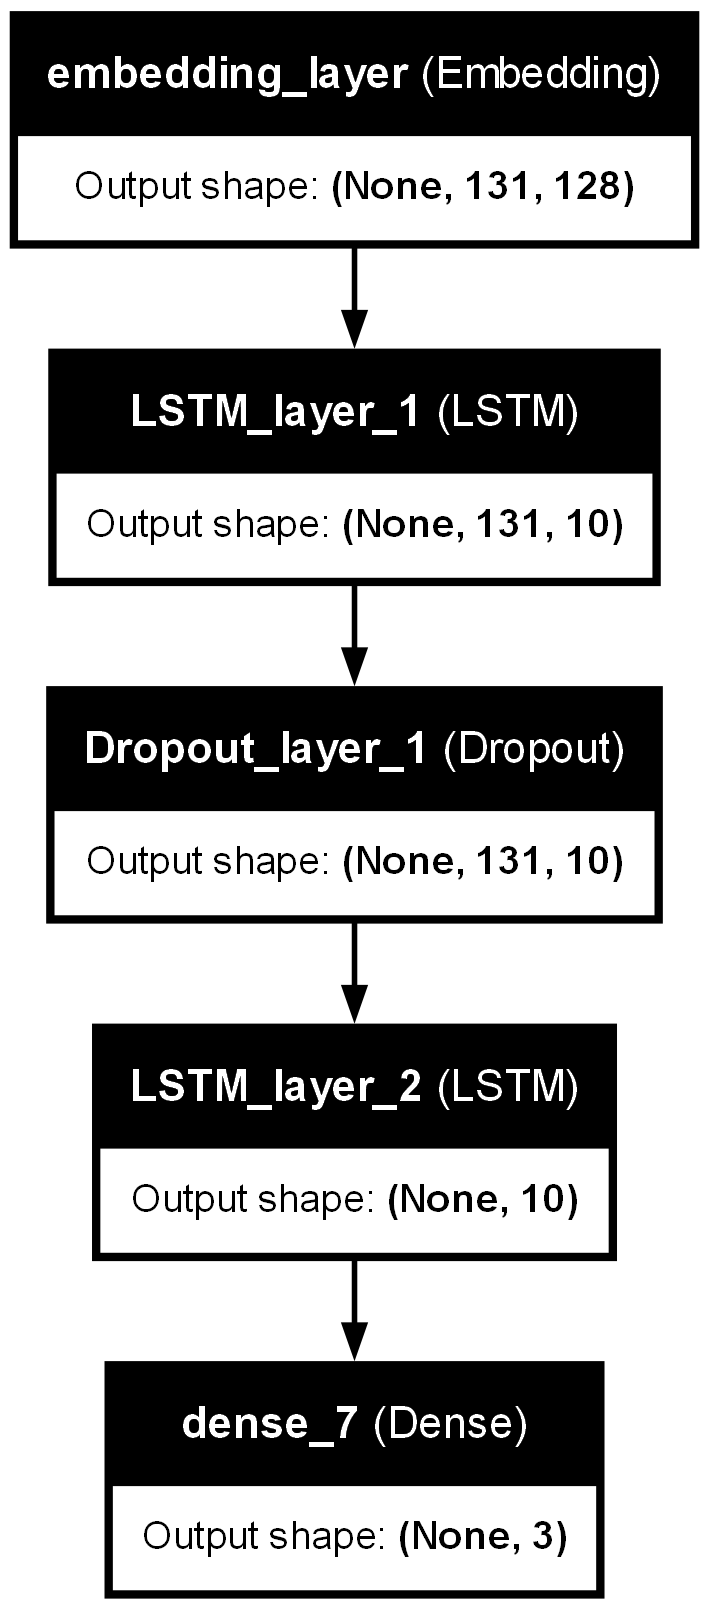

In [227]:
# Tạo đồ thị cho mô hình
plot_model(model, to_file='../Picture_Model/model_LSTM_sentiment.png', show_shapes=True, show_layer_names=True)

> Dump file models_sentiment.h5

In [228]:
model.save('../model/model_sentiment_lstm.h5')

### 3.5 Evaluation test dataset

> Load file model_sentiment_lstm.h5

In [229]:
model_sentiment=load_model("../model/model_sentiment_lstm.h5")

> Get the weight of the embedding layer

In [230]:
weights = model_sentiment.layers[0].get_weights()[0]

# Giảm chiều dữ liệu sử dụng t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(weights)
print(embeddings_2d[0:2])

[[-3.7669299 18.476408 ]
 [ 0.6790288 10.272326 ]]


> Visualize the context and semantic correlation of words

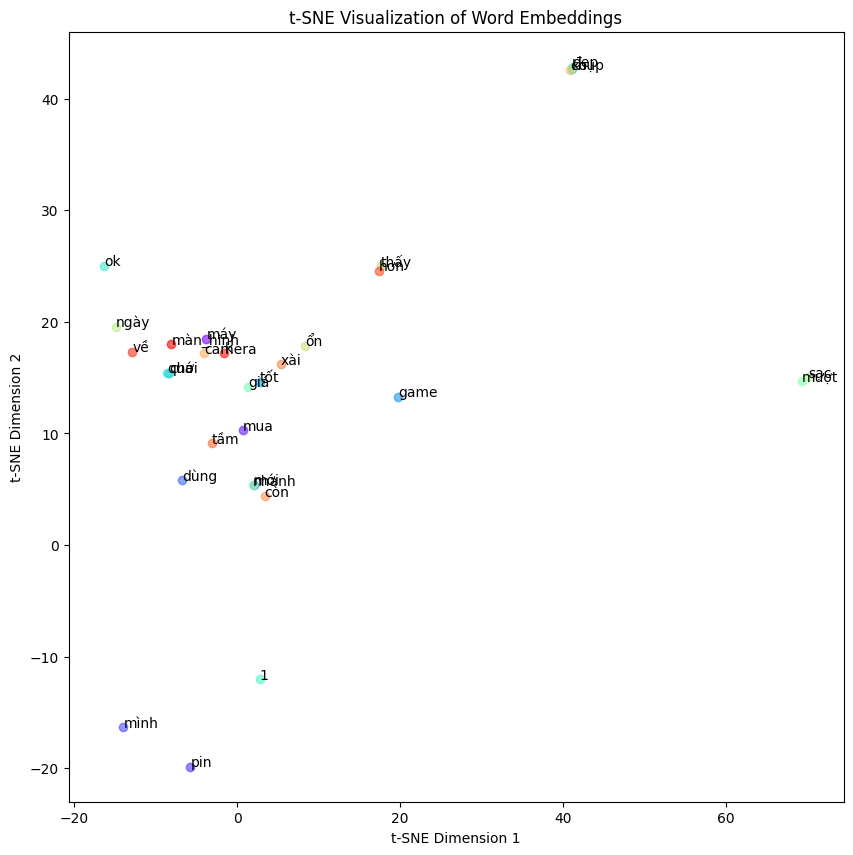

In [231]:
index_word_list = list(X_train_corpus.index_word)
# Vẽ trực quan hóa với nhãn từ
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, 30))
plt.figure(figsize=(10, 10))
for i, word in enumerate(index_word_list [1:31]):  
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], marker='o', color=colors[i], alpha=0.6, label=word)
    plt.annotate(X_train_corpus.index_word[word], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


In [232]:
result = model_sentiment.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


In [233]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 0 2 0 0 0 2 2 2 1]
['Positive' 'Negative' 'Positive' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Neutral']


> Predict one a new sample

In [236]:
comment="Sản phẩm tốt, pin sài cả ngày chưa hết, chơi game lướt web rất mượt, chụp hình đẹp, cầm vừa tay. Rất đáng đồng tiền"
comment= remove_pucntuation(comment)
comment= remove_stopword(comment)
comment= [ViTokenizer.tokenize(comment)]
separatemeaningfulwords = wordseparation(comment)
a_word_embedding=Padding(separatemeaningfulwords)
result_one=model_sentiment.predict(a_word_embedding)
predict_a_label=np.argmax(result_one,axis=1)
print(predict_a_label)
print(label_encoder.inverse_transform(predict_a_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[2]
['Positive']


In [235]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.7842
Precision: 0.7746
Recall: 0.7842
F1-score: 0.7790731294536742
